# Pima Project

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('pima.csv')
na_counts = data.isna().sum()
print(na_counts)
data

pregnant      0
glucose       5
pressure     35
triceps     227
insulin     374
mass         11
pedigree      0
age           0
diabetes      0
dtype: int64


,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,pos
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,neg
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,pos
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,neg
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,pos
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,neg
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,neg
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,neg
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,pos


In [4]:
data_log = data.copy()
data_log['insulin'] = np.log(data_log['insulin'])
data_log['pedigree'] = np.log(data_log['pedigree'])
data_log['age'] = np.log(data_log['age'])
data_log['pregnant'] = np.log(data_log['pregnant'] + 1)

data_log = data_log.drop(data_log['triceps'].idxmax())
data_log

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1.945910,148.0,72.0,35.0,NaN,33.6,-0.466809,3.912023,pos
1,0.693147,85.0,66.0,29.0,NaN,26.6,-1.046969,3.433987,neg
2,2.197225,183.0,64.0,NaN,NaN,23.3,-0.397497,3.465736,pos
3,0.693147,89.0,66.0,23.0,4.543295,28.1,-1.789761,3.044522,neg
4,0.000000,137.0,40.0,35.0,5.123964,43.1,0.827678,3.496508,pos
...,...,...,...,...,...,...,...,...,...
763,2.397895,101.0,76.0,48.0,5.192957,32.9,-1.766092,4.143135,neg
764,1.098612,122.0,70.0,27.0,NaN,36.8,-1.078810,3.295837,neg
765,1.791759,121.0,72.0,23.0,4.718499,26.2,-1.406497,3.401197,neg
766,0.693147,126.0,60.0,NaN,NaN,30.1,-1.052683,3.850148,pos


In [5]:
x = data.drop("diabetes", axis=1)
x.corr()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age
pregnant,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341
glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136
pressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107
triceps,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816
insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261
mass,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841
pedigree,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561
age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000


In [6]:
xl = data_log.drop("diabetes", axis=1)
xl.corr()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age
pregnant,1.000000,0.108752,0.164649,0.050827,0.112035,-0.041870,-0.049517,0.553446
glucose,0.108752,1.000000,0.224792,0.207306,0.616743,0.232662,0.114731,0.270460
pressure,0.164649,0.224792,1.000000,0.238360,0.123073,0.289344,-0.001449,0.347677
triceps,0.050827,0.207306,0.238360,1.000000,0.202422,0.673379,0.091520,0.167310
insulin,0.112035,0.616743,0.123073,0.202422,1.000000,0.256522,0.104300,0.260724
mass,-0.041870,0.232662,0.289344,0.673379,0.256522,1.000000,0.147479,0.057658
pedigree,-0.049517,0.114731,-0.001449,0.091520,0.104300,0.147479,1.000000,0.041673
age,0.553446,0.270460,0.347677,0.167310,0.260724,0.057658,0.041673,1.000000


c:\Users\darth\anaconda3\envs\stat5810\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\darth\anaconda3\envs\stat5810\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\darth\anaconda3\envs\stat5810\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\darth\anaconda3\envs\stat5810\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

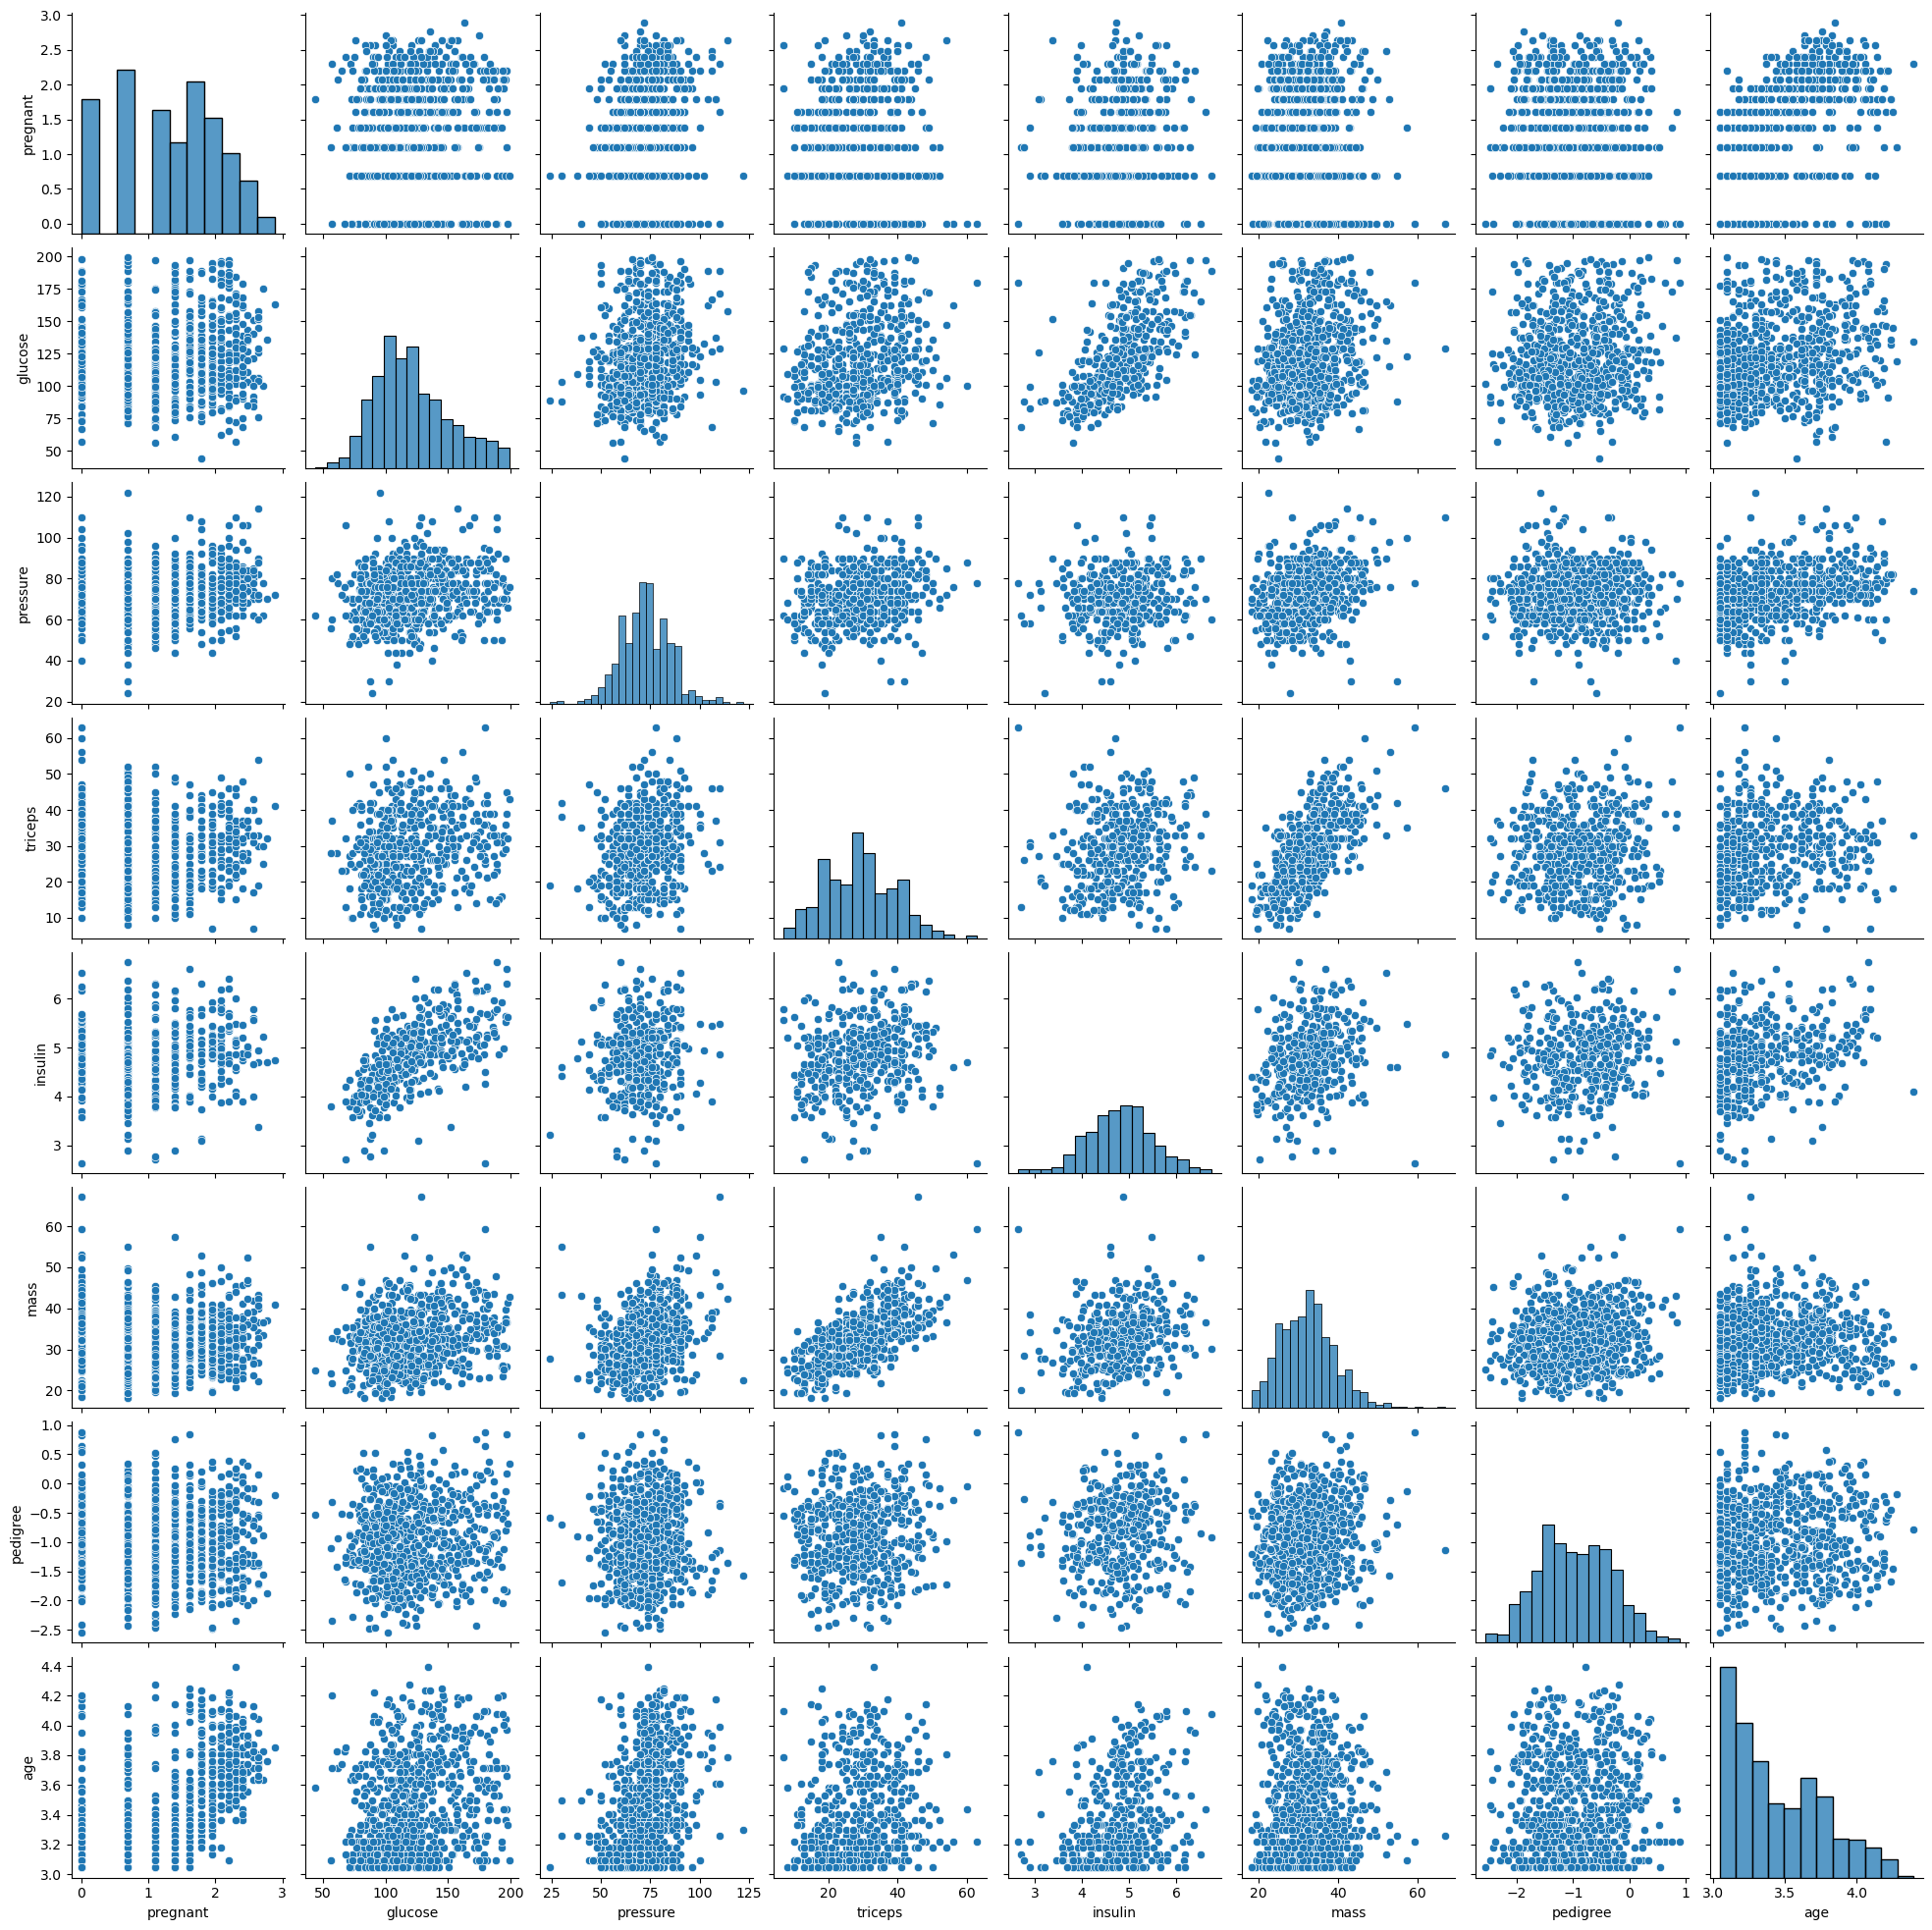

In [7]:
sns.pairplot(data_log.drop("diabetes", axis=1))

In [8]:
data

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,pos
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,neg
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,pos
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,neg
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,pos
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,neg
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,neg
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,neg
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,pos


In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()

data_imputed = pd.DataFrame(imputer.fit_transform(xl), columns=xl.columns)
data_imputed

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age
0,1.945910,148.0,72.0,35.000000,5.163129,33.6,-0.466809,3.912023
1,0.693147,85.0,66.0,29.000000,4.239849,26.6,-1.046969,3.433987
2,2.197225,183.0,64.0,21.036572,5.522523,23.3,-0.397497,3.465736
3,0.693147,89.0,66.0,23.000000,4.543295,28.1,-1.789761,3.044522
4,0.000000,137.0,40.0,35.000000,5.123964,43.1,0.827678,3.496508
...,...,...,...,...,...,...,...,...
762,2.397895,101.0,76.0,48.000000,5.192957,32.9,-1.766092,4.143135
763,1.098612,122.0,70.0,27.000000,4.842472,36.8,-1.078810,3.295837
764,1.791759,121.0,72.0,23.000000,4.718499,26.2,-1.406497,3.401197
765,0.693147,126.0,60.0,26.082528,4.841017,30.1,-1.052683,3.850148


In [12]:
imputer.fit_transform(xl)

array([[  1.94591015, 148.        ,  72.        , ...,  33.6       ,
         -0.46680874,   3.91202301],
       [  0.69314718,  85.        ,  66.        , ...,  26.6       ,
         -1.04696906,   3.4339872 ],
       [  2.19722458, 183.        ,  64.        , ...,  23.3       ,
         -0.39749694,   3.4657359 ],
       ...,
       [  1.79175947, 121.        ,  72.        , ...,  26.2       ,
         -1.40649707,   3.40119738],
       [  0.69314718, 126.        ,  60.        , ...,  30.1       ,
         -1.05268336,   3.8501476 ],
       [  0.69314718,  93.        ,  70.        , ...,  30.4       ,
         -1.15518264,   3.13549422]])

In [10]:
data_imputed['diabetes'] = data['diabetes']
df = data_imputed

c:\Users\darth\anaconda3\envs\stat5810\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\darth\anaconda3\envs\stat5810\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\darth\anaconda3\envs\stat5810\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\darth\anaconda3\envs\stat5810\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

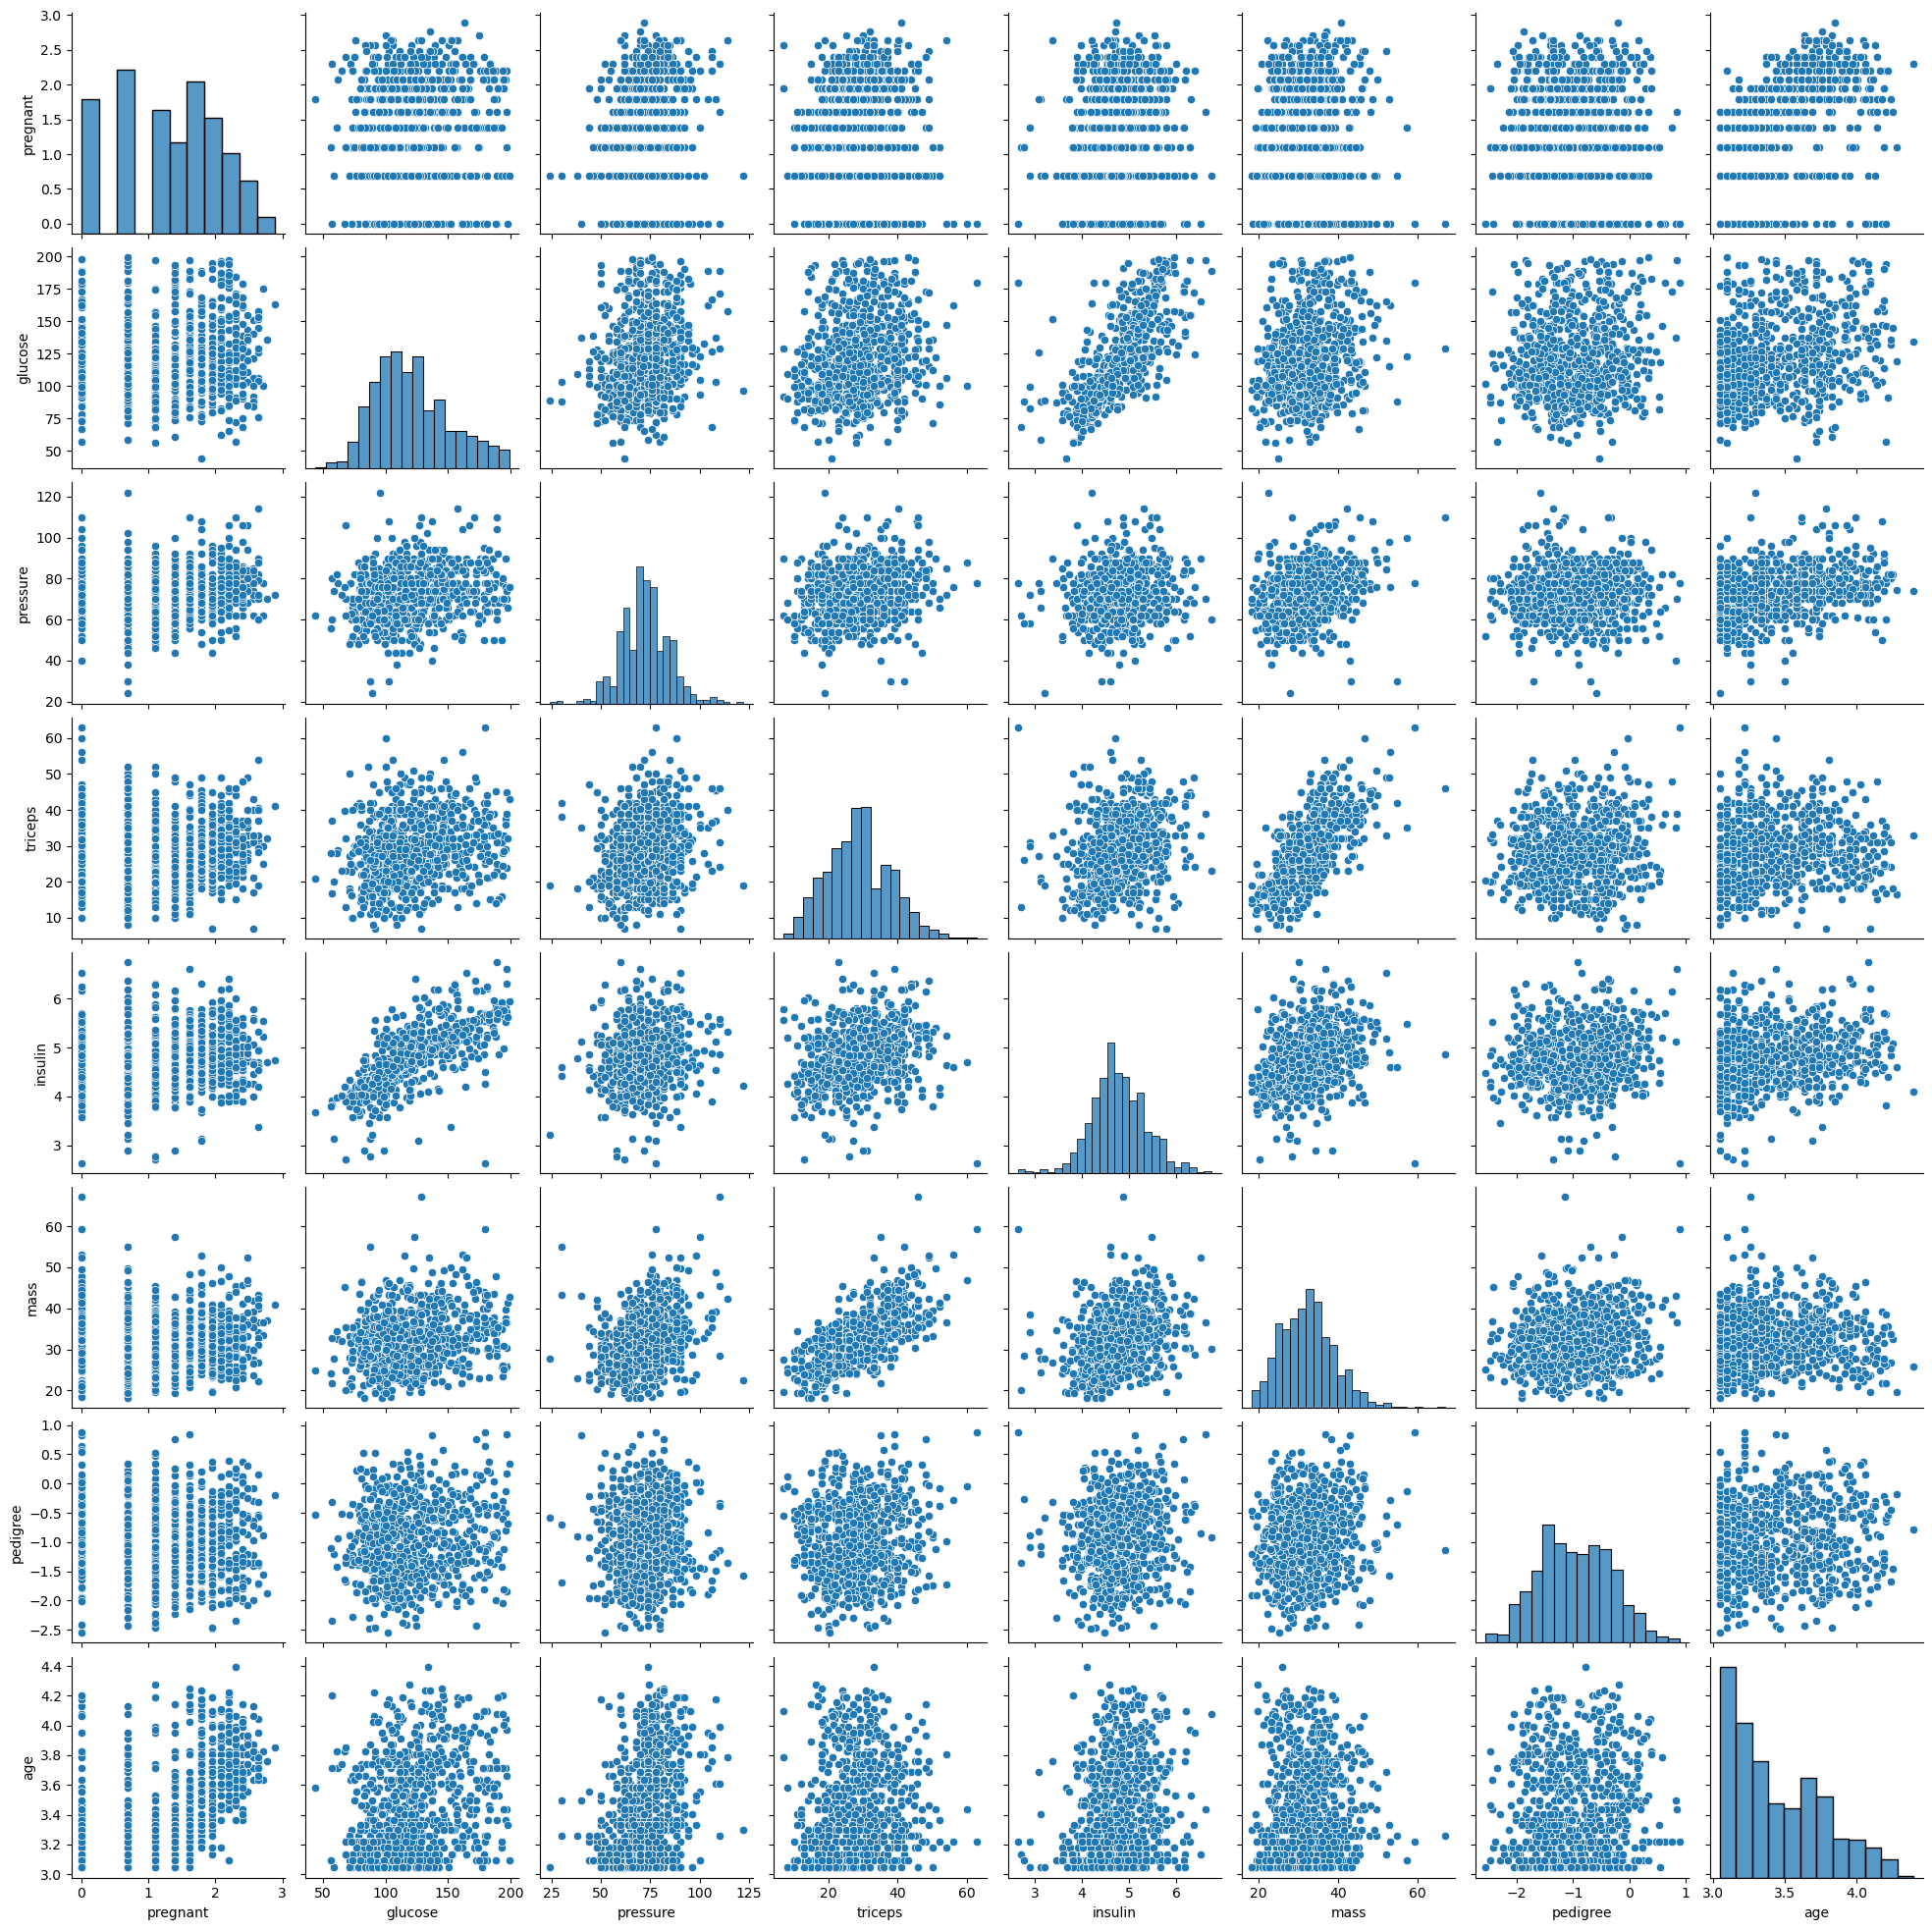

In [11]:
sns.pairplot(df.drop("diabetes", axis=1))

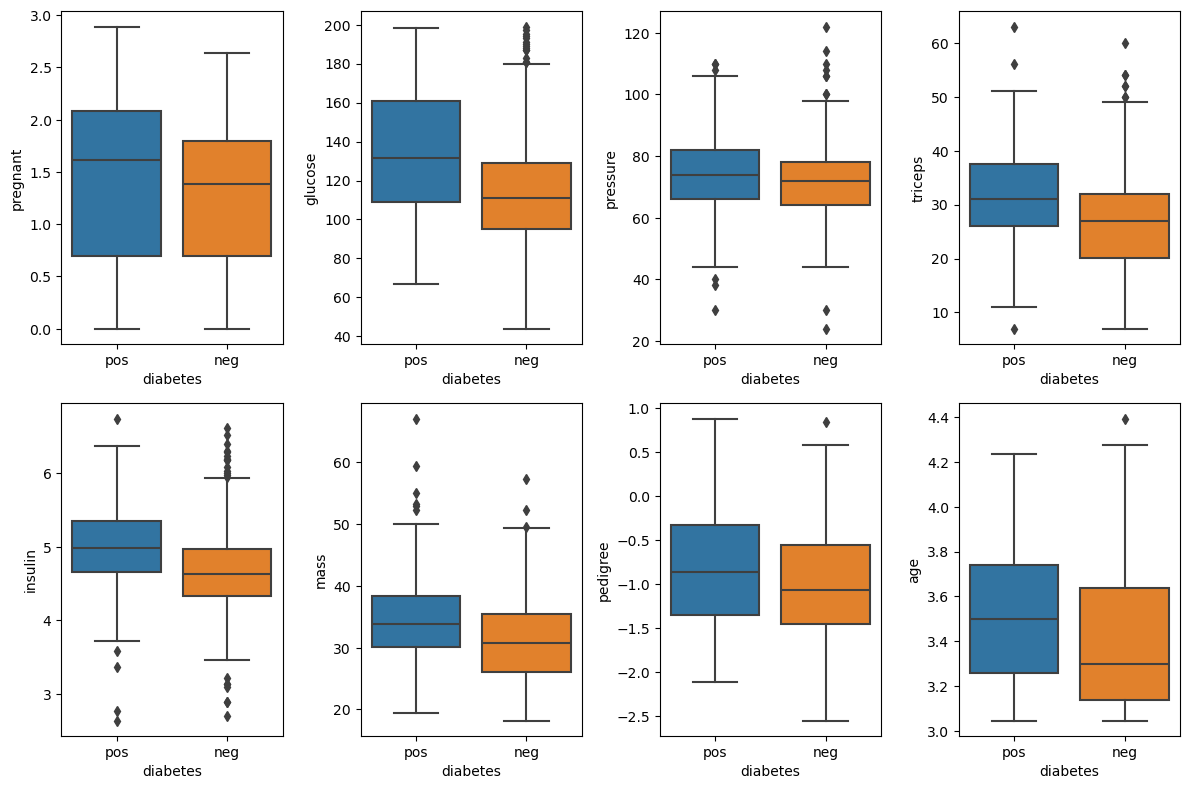

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))

# Iterate over each variable and create a boxplot
for i, column in enumerate(df.columns[:-1]):
    row = i // 4
    col = i % 4
    sns.boxplot(x='diabetes', y=column, data=df, ax=axes[row, col])

# Adjust the layout of subplots
plt.tight_layout()

# Show the plot
plt.show()


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Define the target variable
target = df['diabetes']

# Define the predictor variables
predictors = df.drop('diabetes', axis=1)
# Create an instance of StandardScaler
scaler = StandardScaler()

# Standardize the predictors
predictors_standard = scaler.fit_transform(predictors)

# Fit the GLM model
model = LogisticRegression()
model.fit(predictors_standard, target)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Perform cross-validation
cv_scores = cross_val_score(model, predictors_standard, target, cv=10)

print("Mean cross-validation score:", cv_scores.mean())


y_pred = cross_val_predict(model, predictors_standard, target, cv=10)
cm = confusion_matrix(target, y_pred)
cm

Coefficients: [[ 0.16862929  0.57857107 -0.10980964  0.24033774  0.06511417  0.21320348
   0.21334525  0.10986807]]
Intercept: [-0.73033387]
Mean cross-validation score: 0.7061688311688312


array([[432,  67],
       [158, 110]], dtype=int64)